In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import powerlaw, norm, t, cauchy, pareto
from sklearn.linear_model import LinearRegression, HuberRegressor
import sys
import yfinance as yf

sys.path.append('../')
from src.stats import *

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
sns.set_style('darkgrid')

%matplotlib inline

# 3.1 On the difference between thin and thick tails
## Figure 3.1 - Survival function ratio: fat vs thin tails

Survival function:
$$
S(x) := P(X\geq x)
$$

We want to exam the ratio
$$
\frac{S(x)^2}{S(2x)} = \frac{P(X\geq x)^2}{P(X\geq 2x)} = \frac{P(X\geq x\text{ and } Y\geq x)}{P(X\geq 2x)}
$$
where $X$ and $Y$ are i.i.d random variables.

### normal distribution

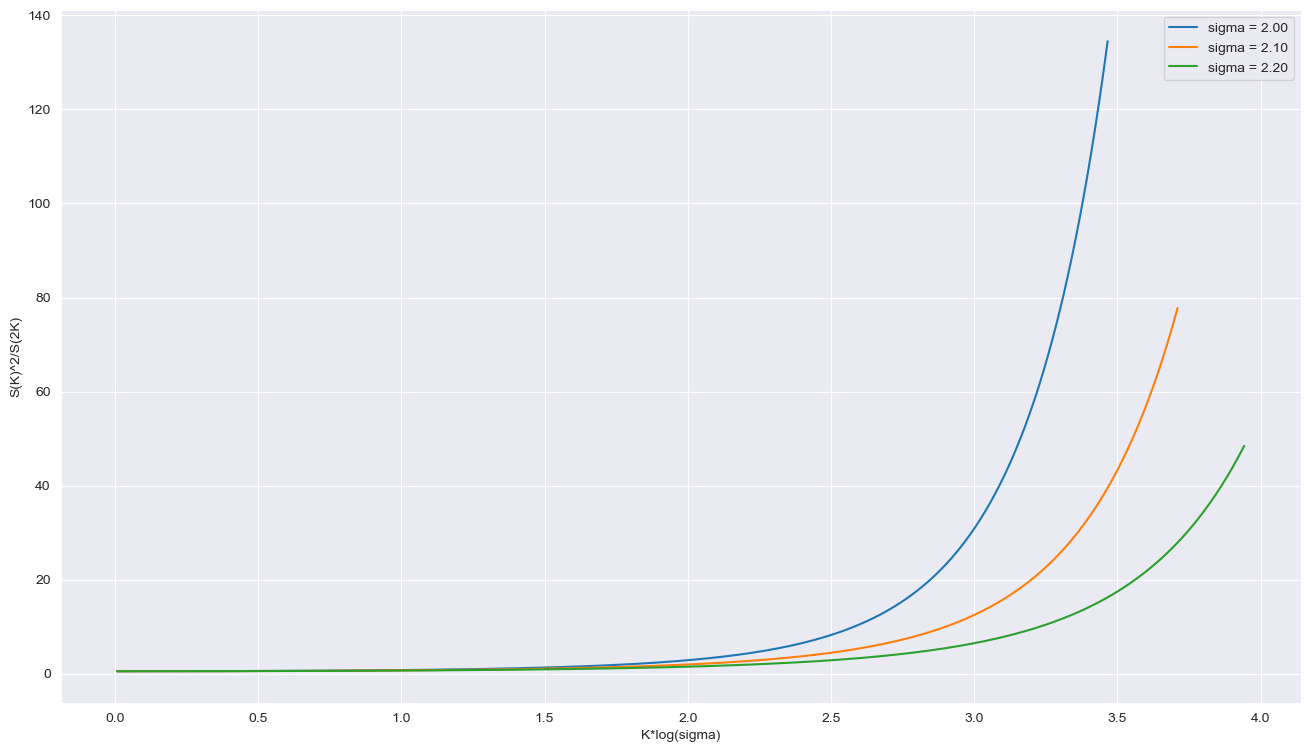

In [2]:
# Define the range of K values
K_values = np.linspace(0.01, 5, 1000)

# Define the range of sigma values
sigma_values = [2.0, 2.1, 2.2]

# Create a meshgrid of K and sigma values
K, sigma = np.meshgrid(K_values, sigma_values)

# Calculate the survival functions
S_K = norm.sf(K, loc=0, scale=sigma)
S_2K = norm.sf(2*K, loc=0, scale=sigma)

# Calculate the ratio S(K)^2/S(2K)
ratio = (S_K**2) / S_2K

# Calculate K*log(sigma)
x = K * np.log(sigma)

# Generate the plot
fig, ax = plt.subplots(figsize=(16, 9))
for i, s in enumerate(sigma_values):
    ax.plot(x[i,:], ratio[i,:], label='sigma = {:.2f}'.format(s))
ax.set_xlabel('K*log(sigma)')
ax.set_ylabel('S(K)^2/S(2K)')
ax.legend()

plt.show()

### t distribution

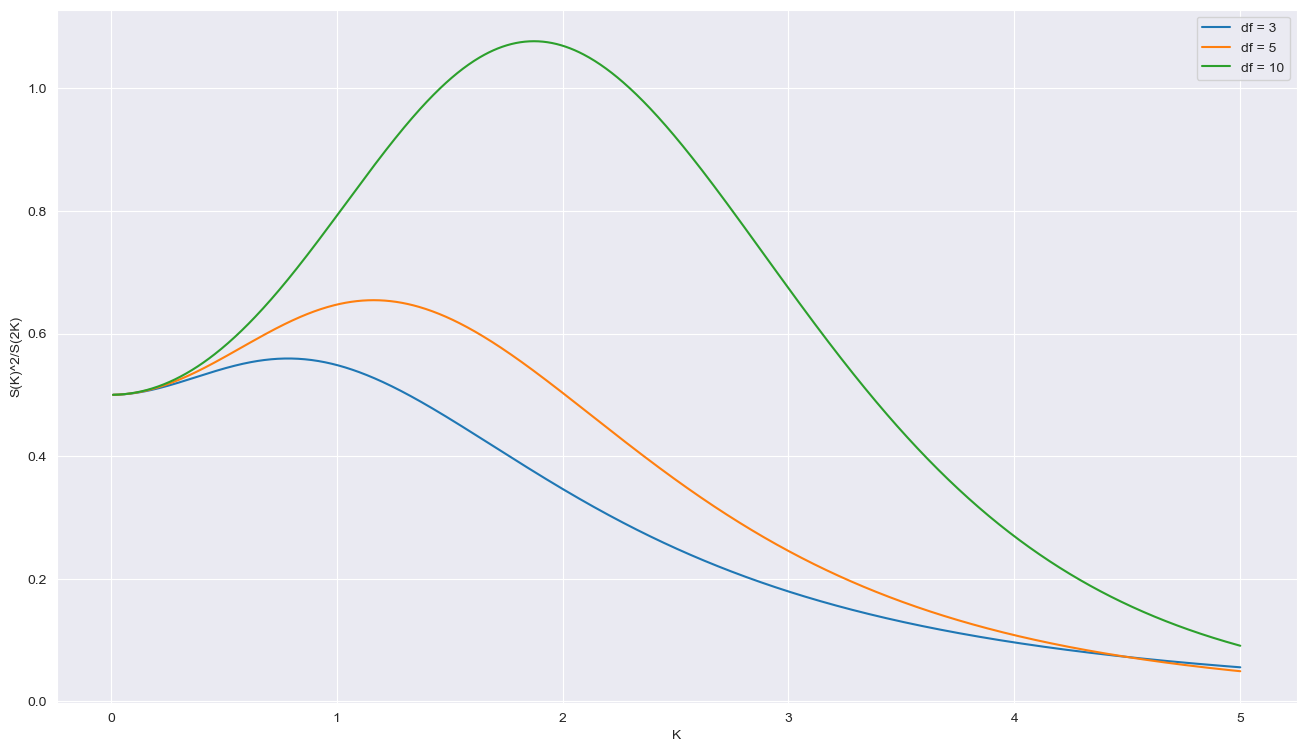

In [3]:
# Define the range of K values
K_values = np.linspace(0.01, 5, 1000)

# Define the range of degrees of freedom
df_values = [3, 5, 10]

# Create a meshgrid of K and degrees of freedom values
K, df = np.meshgrid(K_values, df_values)

# Calculate the survival functions
S_K = t.sf(K, df, loc=0, scale=1)
S_2K = t.sf(2*K, df, loc=0, scale=1)

# Calculate the ratio S(K)^2/S(2K)
ratio = (S_K**2) / S_2K

# Generate the plot
fig, ax = plt.subplots(figsize=(16, 9))
for i, d in enumerate(df_values):
    ax.plot(K[i,:], ratio[i,:], label='df = {}'.format(d))
ax.set_xlabel('K')
ax.set_ylabel('S(K)^2/S(2K)')
ax.legend()

plt.show()

### Cauchy distribution

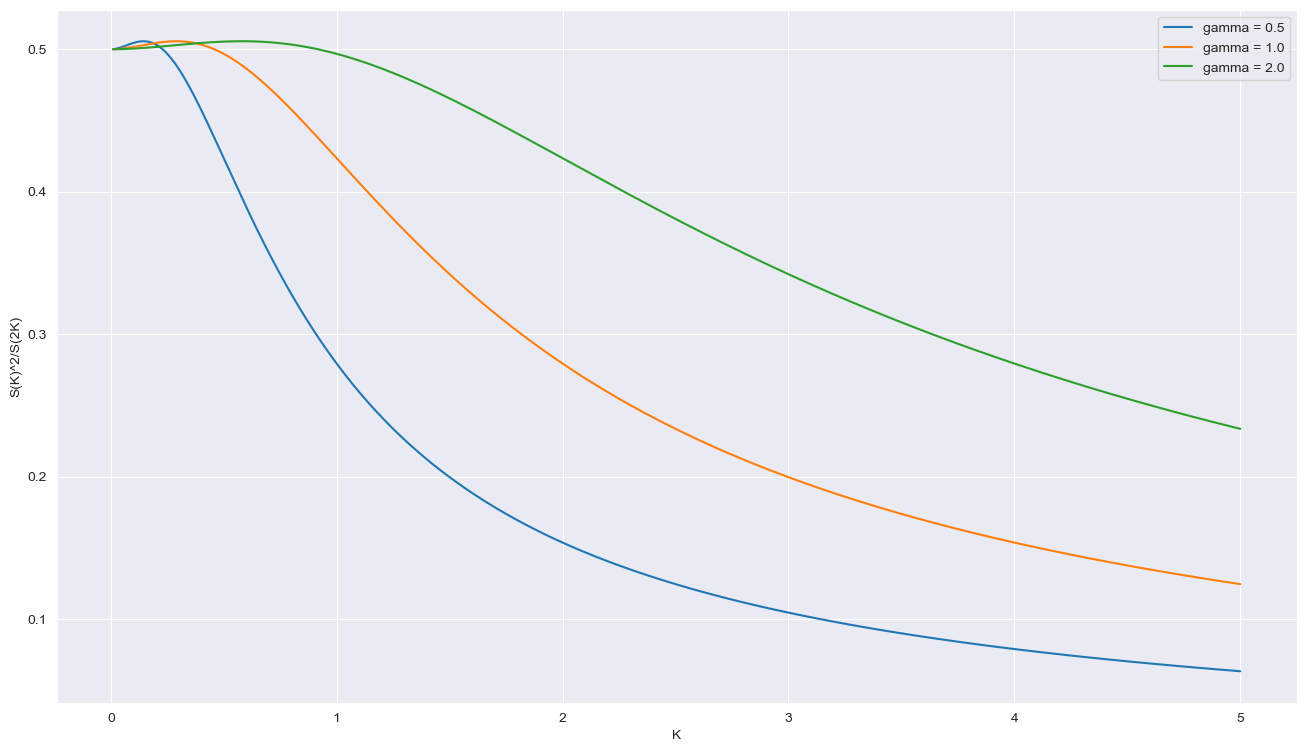

In [4]:
# Define the range of K values
K_values = np.linspace(0.01, 5, 1000)

# Define the range of scale parameters
gam_values = [0.5, 1.0, 2.0]

# Create a meshgrid of K and scale parameter values
K, gam = np.meshgrid(K_values, gam_values)

# Calculate the survival functions
S_K = cauchy.sf(K, loc=0, scale=gam)
S_2K = cauchy.sf(2*K, loc=0, scale=gam)

# Calculate the ratio S(K)^2/S(2K)
ratio = (S_K**2) / S_2K

# Generate the plot
fig, ax = plt.subplots(figsize=(16, 9))
for i, g in enumerate(gam_values):
    ax.plot(K[i,:], ratio[i,:], label='gamma = {:.1f}'.format(g))
ax.set_xlabel('K')
ax.set_ylabel('S(K)^2/S(2K)')
ax.legend()

plt.show()

# 3.2 Tail wagging dogs

## Figures 3.2-3.4 Iso-densities for two independent distributions

### Cauchy distribution

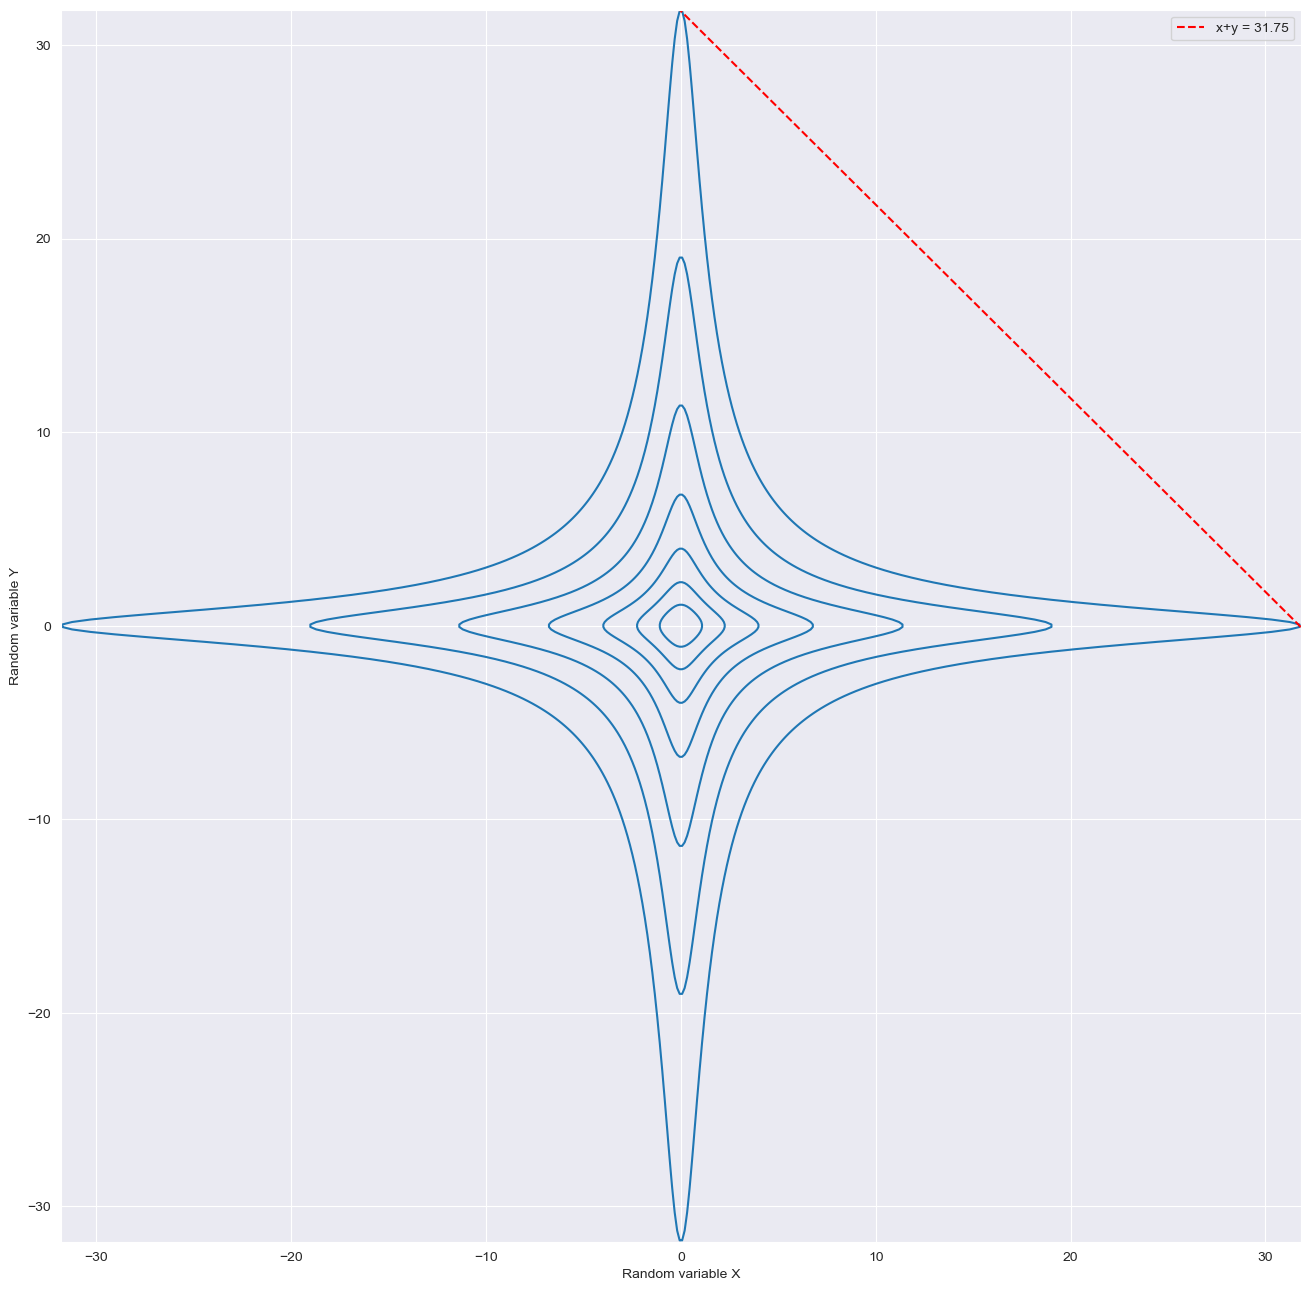

In [5]:
gam = 1  # Cauchy distribution scale parameter
npts = 1000   # number of points to plot

# Create a grid of points to plot the iso-density contours
xq10, xq90 = cauchy.ppf([0.01, 0.99])
xgrid, ygrid = np.meshgrid(np.linspace(xq10, xq90, 500), np.linspace(xq10, xq90, 500))
zgrid = cauchy.pdf(xgrid, loc=0, scale=gam) * cauchy.pdf(ygrid, loc=0, scale=gam)

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 16))

# Plot the iso-density contours
levels = np.logspace(-4, 0, 10)
contours = ax.contour(xgrid, ygrid, zgrid, levels=levels, colors=colors[0])

# Calculate the intersection of the outer contour with the line x + y = a
a = max([p.vertices[:, 0].max() for c in contours.collections if len(c.get_paths())>0 for p in c.get_paths()])
x = np.linspace(xq10, xq90, 1000)
y = a - x
ax.plot(x, y, '--', color='r')

# Add axis labels and legend
ax.set_xlabel('Random variable X')
ax.set_ylabel('Random variable Y')
ax.legend(['x+y = {:.2f}'.format(a)])

# Set the x and y axis limits to show the entire contour
ax.set_xlim(xq10, xq90)
ax.set_ylim(xq10, xq90)

# Display the plot
plt.show()

### normal distribution

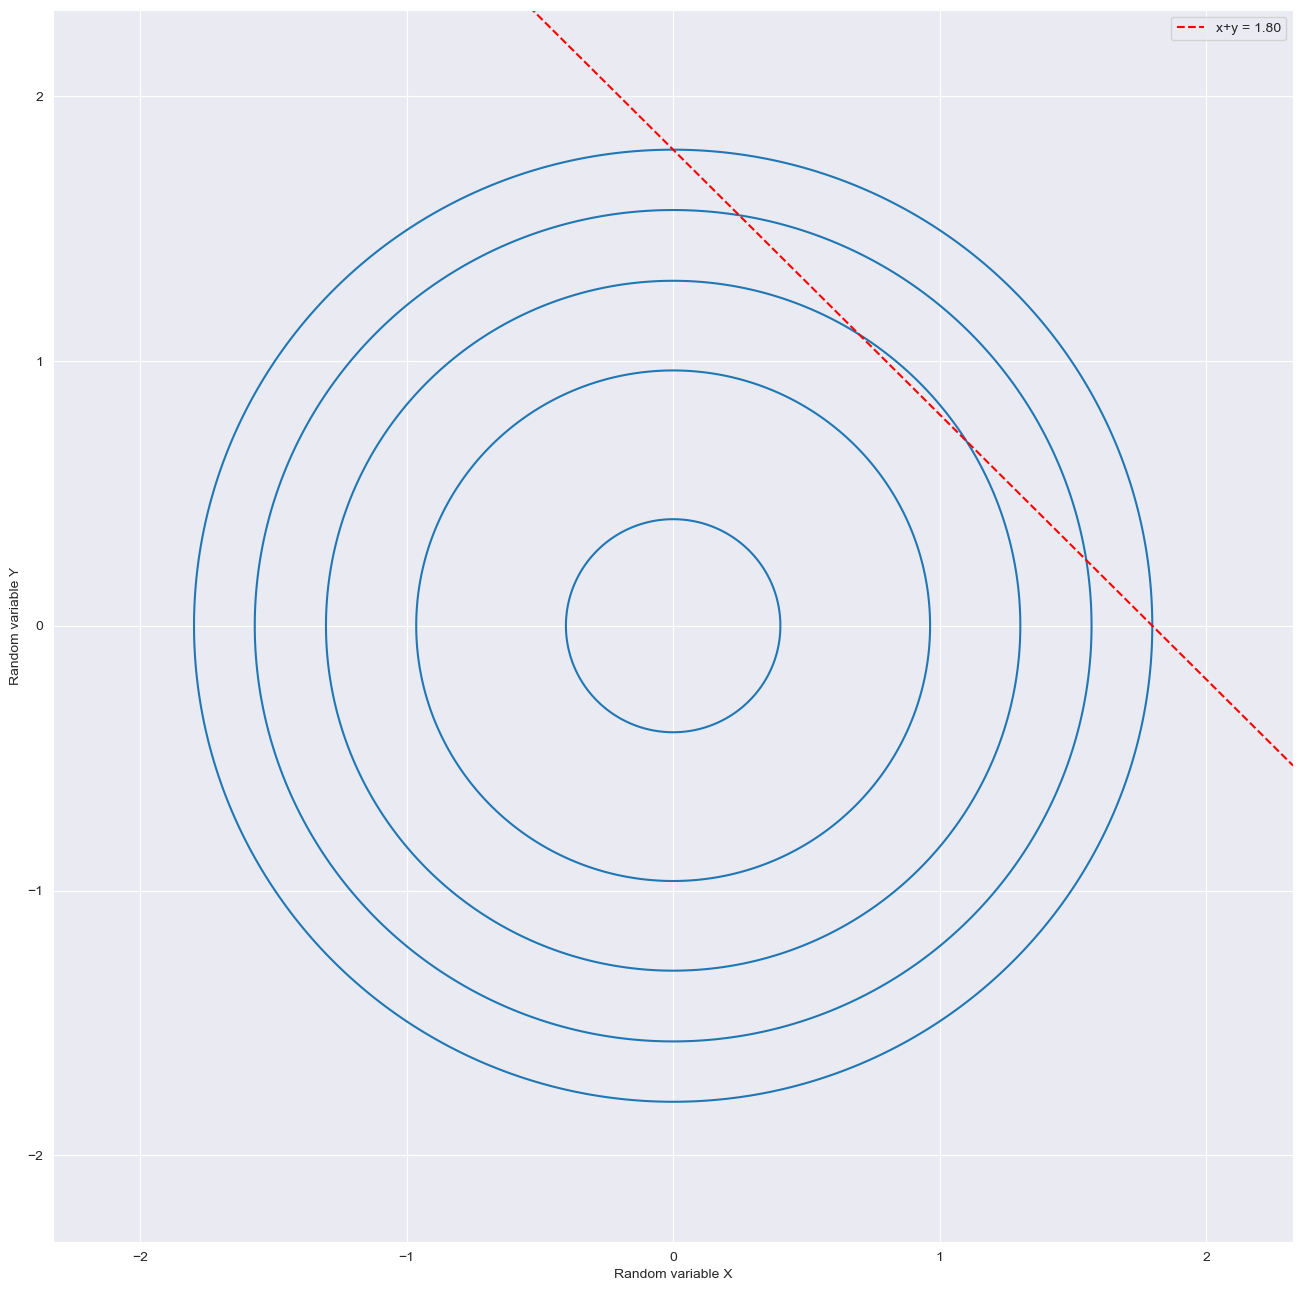

In [6]:
# Set the mean and standard deviation for normal distribution
mu, sigma = 0, 1

# Create a grid of points to plot the iso-density contours
xq10, xq90 = norm.ppf([0.01, 0.99], loc=mu, scale=sigma)
xgrid, ygrid = np.meshgrid(np.linspace(xq10, xq90, 500), np.linspace(xq10, xq90, 500))
zgrid = norm.pdf(xgrid, loc=mu, scale=sigma) * norm.pdf(ygrid, loc=mu, scale=sigma)

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 16))

# Plot the iso-density contours
levels = np.logspace(-1.5, 0, 10)
contours = ax.contour(xgrid, ygrid, zgrid, levels=levels, colors=colors[0])

# Calculate the intersection of the outer contour with the line x + y = a
a = max([p.vertices[:, 0].max() for c in contours.collections if len(c.get_paths())>0 for p in c.get_paths()])
x = np.linspace(xq10, xq90, 1000)
y = a - x
ax.plot(x, y, '--', color='r')

# Add axis labels and legend
ax.set_xlabel('Random variable X')
ax.set_ylabel('Random variable Y')
ax.legend(['x+y = {:.2f}'.format(a)])

# Set the x and y axis limits to show the entire contour
ax.set_xlim(xq10, xq90)
ax.set_ylim(xq10, xq90)

# Display the plot
plt.show()

# 3.3 The law of large numbers

## Figure 3.5 - The law of large numbers

### 80-20 Pareto distribution

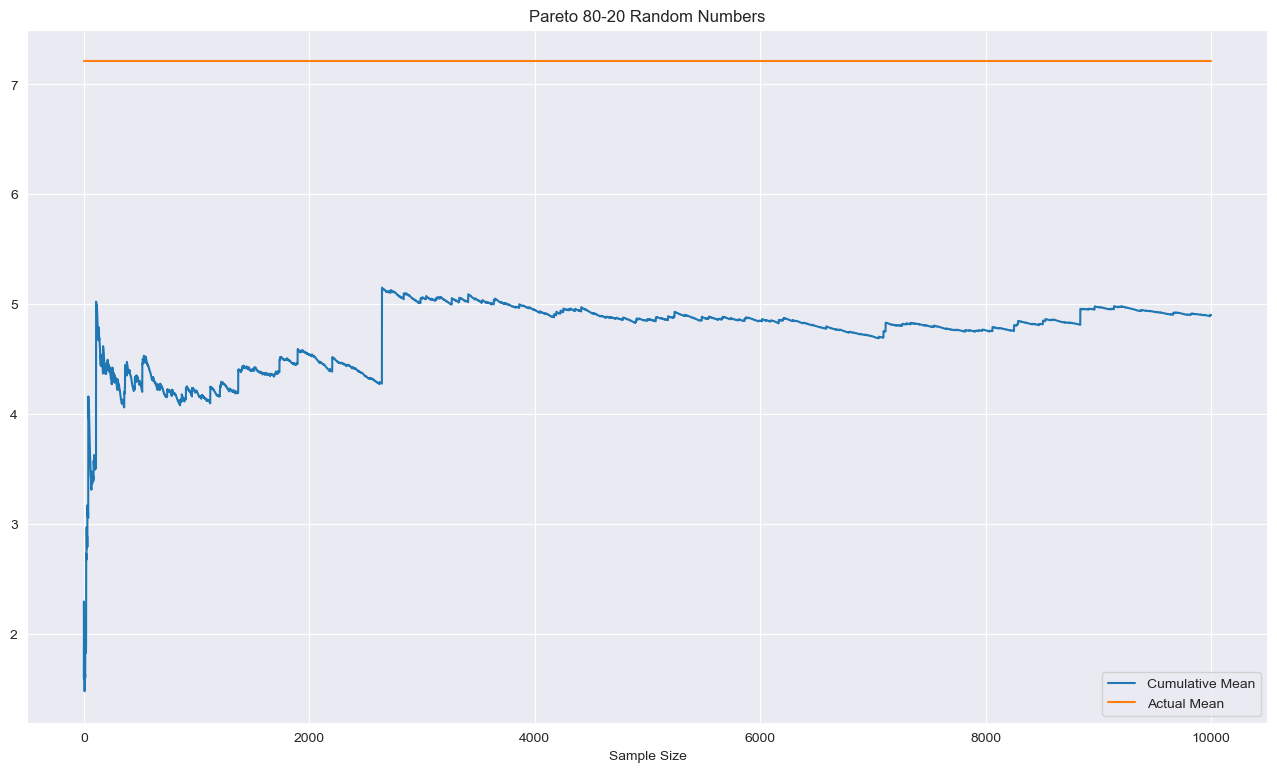

In [7]:
# Generate Pareto 80-20 random numbers
n = 10000
alpha = 1.161  # Pareto shape parameter for 80-20 distribution (https://en.wikipedia.org/wiki/Pareto_distribution)
x = pareto.rvs(alpha, size=n, random_state=1)
mu = pareto.mean(alpha)  # Pareto mean

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 9))

# Plot the cumulative mean
ax.plot(np.cumsum(x) / np.arange(1, len(x) + 1), label='Cumulative Mean')
ax.plot([0, n], [mu, mu] , label='Actual Mean')

# Add axis labels and title
ax.legend()
ax.set_xlabel('Sample Size')
ax.set_title('Pareto 80-20 Random Numbers')

# Display the plot
plt.show()

### normal distribution

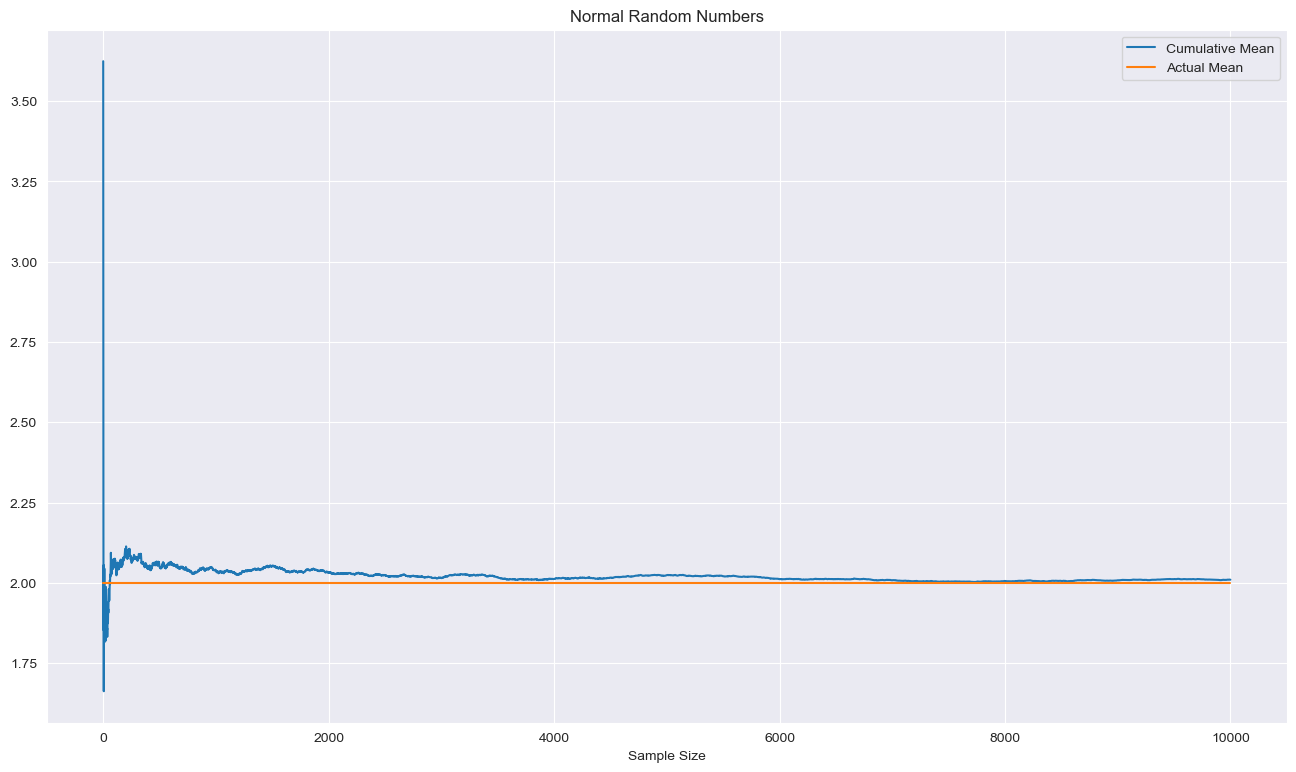

In [8]:
# Generate normal random numbers
n = 10000
mu = 2
sigma = 1
x = norm.rvs(mu, sigma, size=n, random_state=1)

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 9))

# Plot the cumulative mean
ax.plot(np.cumsum(x) / np.arange(1, len(x) + 1), label='Cumulative Mean')
ax.plot([0, n], [mu, mu], label='Actual Mean')

# Add axis labels and title
ax.legend()
ax.set_xlabel('Sample Size')
ax.set_title('Normal Random Numbers')

# Display the plot
plt.show()

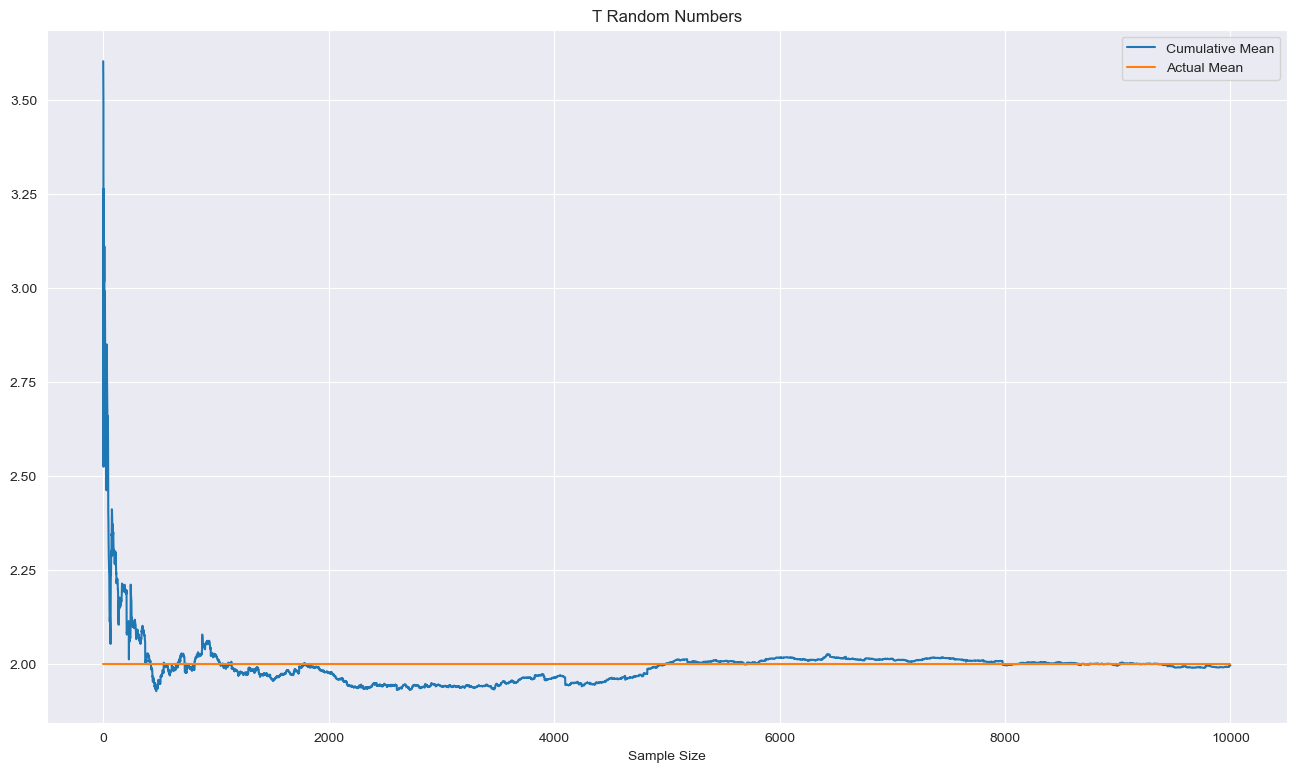

In [9]:
# Generate t random numbers
n = 10000
mu = 2
sigma = 1
df = 2
x = t.rvs(df, mu, sigma, size=n, random_state=10)

# Set the figure size
fig, ax = plt.subplots(figsize=(16, 9))

# Plot the cumulative mean
ax.plot(np.cumsum(x) / np.arange(1, len(x) + 1), label='Cumulative Mean')
ax.plot([0, n], [mu, mu], label='Actual Mean')

# Add axis labels and title
ax.legend()
ax.set_xlabel('Sample Size')
ax.set_title('T Random Numbers')

# Display the plot
plt.show()

# 3.4 The main consequences and how they link to the book

## Figure 3.8 - Linear least-square regression doesn’t work (failure of the Gauss-Markov theorem)

Not sure with how the regression line in the 2nd plot was generated. So I tired the following approach:
1. Generate random numbers from a simple regression with student-t residuals (thus we have "outliers").
2. We detect these "outliers" using the robust HuberRegressor + median absolute devation.
3. These robust estimators intentionally downweights the "outliers" when computing the regression line. But here we want to the opposite, we run the OLS regression on these "outliers" only, i.e. a regression line that accommodates the large deviation while mistracks small ones. 

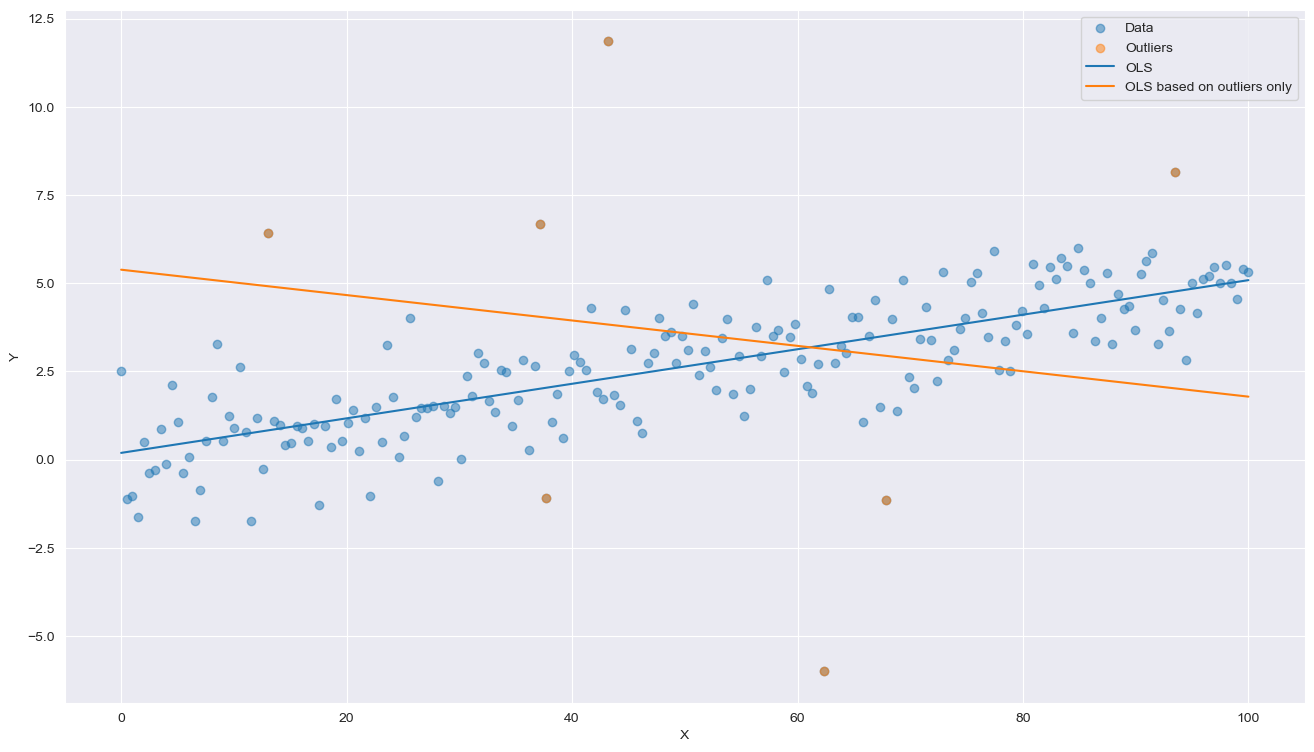

In [10]:
# Generate data from a linear regression model with a student-t error term
n = 200
x = np.linspace(0, 100, n)
y = 0 + 1/20 * x + t.rvs(3, size=n, random_state=1)

# Fit ordinary least squares regression
ols = LinearRegression().fit(x.reshape(-1, 1), y)
ols_pred = ols.predict(x.reshape(-1, 1))

# Find the outliers of the regression
outliers = detect_simple_regression_outliers(x, y, threshold=3.0)

# Fit ordinary least squares regression on outliers only
ols_outliers = LinearRegression().fit(x[outliers].reshape(-1, 1), y[outliers])
ols_outliers_pred = ols_outliers.predict(x.reshape(-1, 1))

# Plot the results
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x, y, alpha=0.5, label='Data')
ax.scatter(x[outliers], y[outliers], alpha=0.5, label='Outliers')
ax.plot(x, ols_pred, label='OLS')
ax.plot(x, ols_outliers_pred, label='OLS based on outliers only')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()


## Figure 3.10 - Pre-2008 Sharpe Ratios vs. 2008 Losses
I use ETFs instead since I do not have hedge funds data. We can see the pre-2008 Sharpe ratios have no correlation with the 2008 losess for stock based ETFs. The only outlier is SHY, which is the iShares 1-3 Year Treasury Bond ETF, not surprising! 

[*********************100%***********************]  23 of 23 completed


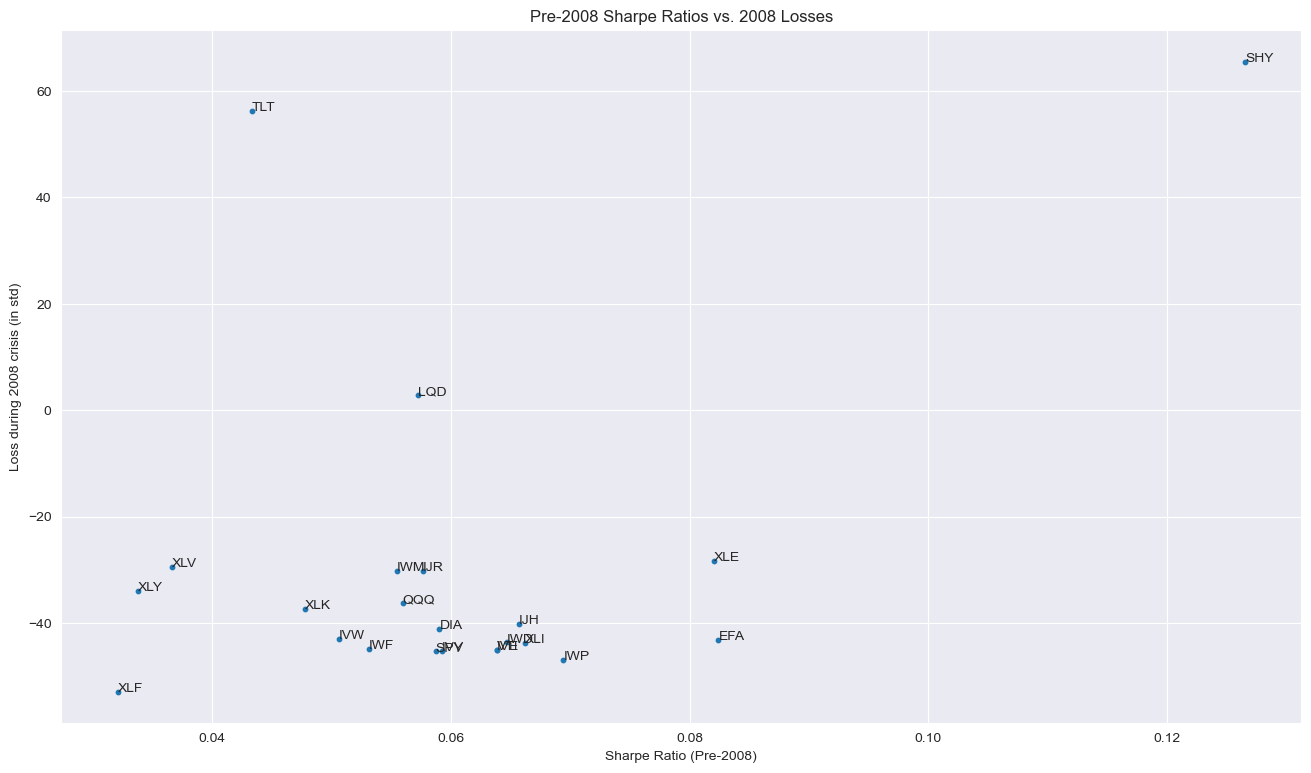

In [11]:
# Define the ETF symbols and date ranges
etf_symbols = ['DIA', 'EFA', 'IJH', 'IJR', 'IVE', 'IVV', 'IVW', 'IWD', 'IWF', 'IWM',
       'IWP', 'LQD', 'QQQ', 'SPY',  'VTI', 'XLE', 'XLF', 'XLI', 'XLK', 'XLV', 'XLY', 'SHY', 'TLT']
start_date = '2003-01-01'
pre_crisis_end_date = '2007-12-31'
crisis_start_date = '2008-01-01'
crisis_end_date = '2008-12-31'

# Download ETF data
etf_data = yf.download(etf_symbols, start=start_date, end=crisis_end_date)
etf_return = etf_data['Adj Close'].pct_change().dropna()

# Compute Sharpe ratio (here I ignore the risk free rate) and losses in 2018
summary = pd.DataFrame(index=etf_return.columns)
summary['pre_crisis_sharpe_ratio'] = etf_return.loc[:pre_crisis_end_date].mean()/etf_return.loc[:pre_crisis_end_date].std()
summary['crisis_loss'] = etf_data['Adj Close'].loc[:crisis_end_date].iloc[-1]/etf_data['Adj Close'].loc[crisis_start_date:].iloc[0]-1
summary['crisis_loss_in_std'] = summary['crisis_loss']/etf_return.loc[:pre_crisis_end_date].std()

# Plot the results
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(summary['pre_crisis_sharpe_ratio'], summary['crisis_loss_in_std'], s=10)

for symbol in summary.index:
    ax.annotate(symbol, (summary.loc[symbol,'pre_crisis_sharpe_ratio'], summary.loc[symbol, 'crisis_loss_in_std']))

ax.set_xlabel('Sharpe Ratio (Pre-2008)')
ax.set_ylabel('Loss during 2008 crisis (in std)')
ax.set_title('Pre-2008 Sharpe Ratios vs. 2008 Losses')

plt.show()